# Making a new hybrid grid file

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Open existing hycom1 file and vcoord file

In [39]:
ds_hycom = xr.open_dataset("/g/data/x77/ahg157/inputs/mom6/panan/hycom1_75_800m.nc")
ds_vcoord = xr.open_dataset("/g/data/x77/ahg157/inputs/mom6/panan/vcoord.nc")

In [3]:
dz_KDS75 = np.diff(ds_vcoord.st_edges_ocean.values)

In [4]:
## FNC1 code:
## Original
dz_min = 1.082
h_total=4000
power = 4.5
nk = 75

dz=np.zeros(nk)

for k in range(nk):
    dz[k] = ((k)/(nk))**power
    
dz = ( h_total - (nk) * dz_min ) * ( dz / np.sum(dz) ) #! Rescale to so total is H_total
dz[-1] = dz[-1] + ( h_total - np.sum( dz + dz_min ) ) #! Adjust bottommost layer
dz = dz + dz_min #! Finally add in the constant dz_min

In [59]:
## FNC1 code:
## trying to match KDS75
dz_min = 1.1
h_total=4500
power = 2.65
nk = 75

ddz=np.zeros(nk)

for k in range(nk):
    ddz[k] = ((k)/(nk))**power
    
ddz = ( h_total - (nk) * dz_min ) * ( ddz / np.sum(ddz) ) #! Rescale to so total is H_total
ddz[-1] = ddz[-1] + ( h_total - np.sum( ddz + dz_min ) ) #! Adjust bottommost layer
ddz = ddz + dz_min #! Finally add in the constant dz_min

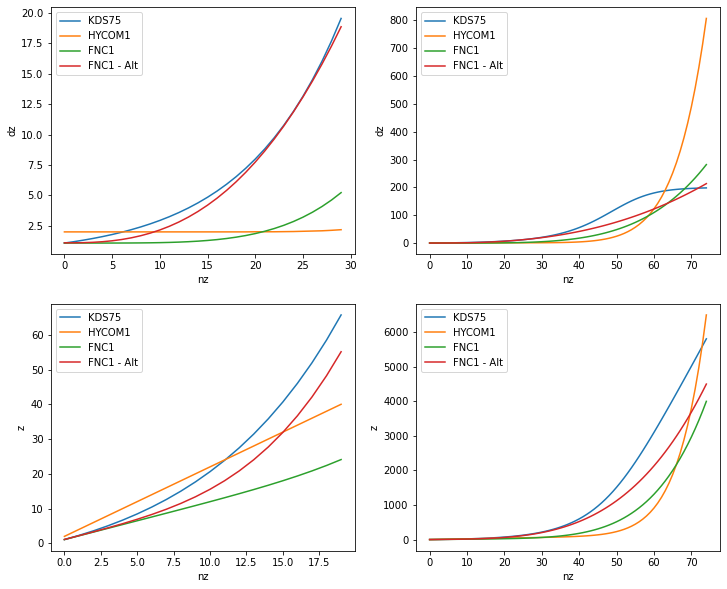

In [60]:
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(dz_KDS75[:30],label='KDS75')
plt.plot(ds_hycom.dz[:30],label='HYCOM1')
plt.plot(dz[:30],label='FNC1')
plt.plot(ddz[:30],label='FNC1 - Alt')
plt.ylabel('dz')
plt.xlabel('nz')
plt.legend()
plt.subplot(222)
plt.plot(dz_KDS75,label='KDS75')
plt.plot(ds_hycom.dz,label='HYCOM1')
plt.plot(dz,label='FNC1')
plt.plot(ddz,label='FNC1 - Alt')
plt.ylabel('dz')
plt.xlabel('nz')
plt.legend()
plt.subplot(223)
plt.plot(np.cumsum(dz_KDS75[:20]),label='KDS75')
plt.plot(np.cumsum(ds_hycom.dz[:20]),label='HYCOM1')
plt.plot(np.cumsum(dz[:20]),label='FNC1')
plt.plot(np.cumsum(ddz[:20]),label='FNC1 - Alt')
plt.ylabel('z')
plt.xlabel('nz')
plt.legend()
plt.subplot(224)
plt.plot(np.cumsum(dz_KDS75),label='KDS75')
plt.plot(np.cumsum(ds_hycom.dz),label='HYCOM1')
plt.plot(np.cumsum(dz),label='FNC1')
plt.plot(np.cumsum(ddz),label='FNC1 - Alt')
plt.ylabel('z')
plt.xlabel('nz')
plt.legend()

In [97]:
rho2_hycom = ds_hycom.sigma2.values

In [98]:
drho2 = np.diff(rho2_hycom)
drho2_new = drho2.copy()
drho2_new[:44] = 0.5*drho2_new[:44]
drho2_new[44] = 0.65*drho2_new[44]
drho2_new[45] = 0.85*drho2_new[45]
rho2_new = np.zeros(76)
rho2_new[-1] = rho2_hycom[-1]
for i in range(1,76):
    rho2_new[-1-i] = rho2_new[-i]-drho2_new[-i]

(0.0, 0.2)

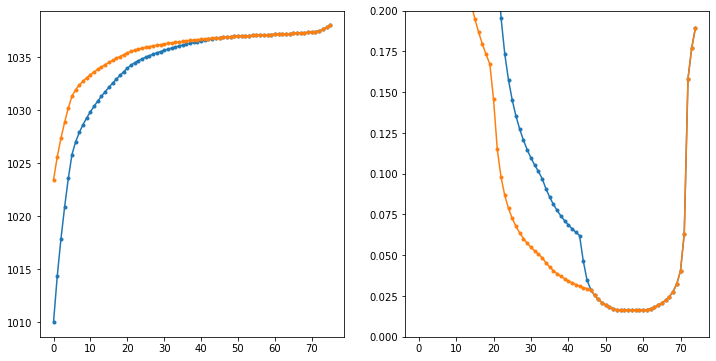

In [99]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(rho2_hycom,marker='.')
plt.plot(rho2_new,marker='.')
plt.subplot(122)
plt.plot(drho2,marker='.')
plt.plot(drho2_new,marker='.')
plt.ylim([0,0.2])

In [102]:
ds_hycom['sigma2'].values = rho2_new
#ds_hycom.to_netcdf('/g/data/x77/amh157/hycom1_kds75.nc')
ds_hycom.to_netcdf('/g/data/x77/ahg157/inputs/mom6/panan-01/hycom1_panant.nc')